In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division

A simple data loading function.

In [2]:
### load data
def load_data(csvname):
    data = np.array(np.genfromtxt(csvname, delimiter=','))
    X = data[:,0:-1]
    y = data[:,-1]
    y = np.reshape(y,(np.size(y),1))
    return X,y

All of the functionality we need to create a gradient descent loop - including functions for computing cost function value, and the descent loop itself.

In [3]:
# YOUR CODE GOES HERE -- gradient descent for single layer tanh nn 

# The Architecture of this tanh nerual network is to use tanh as activiation function, and cost function is sigmoid.
def gradient_descent(X,y,M):
    b = 0
    w = np.random.rand(M, 1) * 0.01
    c = np.zeros((M, 1))
    V = np.random.rand(M, 2) * 0.01
    P = np.size(y)
    
    alpha = 0.01 
    l_p = np.ones((P, 1))
    max_its = 10000
    k = 1
    X = X.T
    for k in range(max_its):
        q = np.zeros((P,1))
        for p in np.arange(0,P):
            x = X[p].reshape(1,np.size(X[p]))
            q[p] = 1 / (1 + np.exp(y[p] * (b + np.dot(w.T, np.tanh(c + np.dot(V, x.T))))))
        grad_b = -1 * np.dot(l_p.T, q * y)
        grad_w = np.zeros((M, 1))
        grad_c = np.zeros((M, 1))
        grad_V = np.zeros((M, 2))
        for m in np.arange(0, M):
            _v = V[m]
            _v.shape = (2, 1)
            t = np.tanh(c[m] +np.dot(X,_v))
            s = 1 / np.cosh(c[m]+np.dot(X,_v))**2
            grad_w[m] = -1 * np.dot(l_p.T,q * t * y)
            grad_c[m] = -1 * np.dot(l_p.T,q * s * y) * w[m]
            grad_V[m] = (-1 * np.dot(X.T, q * s * y) * w[m]).reshape(2,)
        b = b - alpha * grad_b
        w = w - alpha * grad_w
        c = c - alpha * grad_c
        V = V - alpha * grad_V
        k = k + 1
    return b, w, c, V

Next our plotting functionality - both plotting points and nonlinear separator.

In [4]:
# plot points
def plot_points(X,y):
    ind = np.nonzero(y==1)[0]
    plt.plot(X[ind,0],X[ind,1],'ro')
    ind = np.nonzero(y==-1)[0]
    plt.plot(X[ind,0],X[ind,1],'bo')
    plt.hold(True)

# plot the seprator + surface
def plot_separator(b,w,c,V,X,y):
    s = np.arange(-1,1,.01)
    s1, s2 = np.meshgrid(s,s)

    s1 = np.reshape(s1,(np.size(s1),1))
    s2 = np.reshape(s2,(np.size(s2),1))
    g = np.zeros((np.size(s1),1))

    t = np.zeros((2,1))
    for i in np.arange(0,np.size(s1)):
        t[0] = s1[i]
        t[1] = s2[i]
        F = np.tanh(c + np.dot(V,t))
        g[i] = np.tanh(b + np.dot(F.T,w))

    s1 = np.reshape(s1,(np.size(s),np.size(s)))
    s2 = np.reshape(s2,(np.size(s),np.size(s)))
    g = np.reshape(g,(np.size(s),np.size(s)))

    # plot contour in original space
    plt.contour(s1,s2,g,1,color = 'k')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.hold(True)

With everything defined lets run all.

/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consis

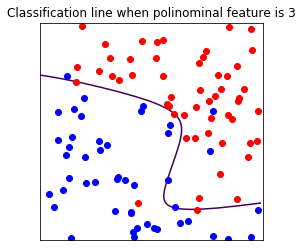

In [9]:
# load data
X, y = load_data('genreg_data.csv')
M = 3                  # number of basis functions to use / hidden units

# perform gradient descent to fit tanh basis sum
b,w,c,V = gradient_descent(X.T,y,M)

# plot resulting fit
fig = plt.figure(facecolor = 'white',figsize = (4,4))
plot_points(X,y)
plt.title("Classification line when polinominal feature is 3")
plot_separator(b,w,c,V,X,y)
plt.show()

/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consis

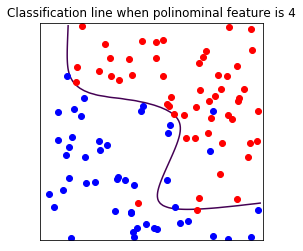

In [10]:
# load data
X, y = load_data('genreg_data.csv')
M = 4                  # number of basis functions to use / hidden units

# perform gradient descent to fit tanh basis sum
b,w,c,V = gradient_descent(X.T,y,M)

# plot resulting fit
fig = plt.figure(facecolor = 'white',figsize = (4,4))
plot_points(X,y)
plot_separator(b,w,c,V,X,y)
plt.title("Classification line when polinominal feature is 4")
plt.show()

/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consis

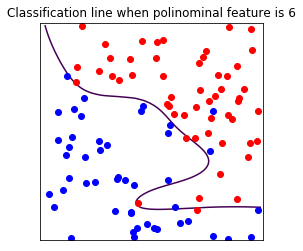

In [11]:
# load data
X, y = load_data('genreg_data.csv')
M = 6                  # number of basis functions to use / hidden units

# perform gradient descent to fit tanh basis sum
b,w,c,V = gradient_descent(X.T,y,M)

# plot resulting fit
fig = plt.figure(facecolor = 'white',figsize = (4,4))
plot_points(X,y)
plot_separator(b,w,c,V,X,y)
plt.title("Classification line when polinominal feature is 6")
plt.show()

/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
/Users/kevin/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)
/Users/kevin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consis

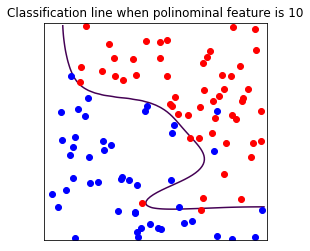

In [12]:
# load data
X, y = load_data('genreg_data.csv')
M = 10                  # number of basis functions to use / hidden units

# perform gradient descent to fit tanh basis sum
b,w,c,V = gradient_descent(X.T,y,M)

# plot resulting fit
fig = plt.figure(facecolor = 'white',figsize = (4,4))
plot_points(X,y)
plot_separator(b,w,c,V,X,y)
plt.title("Classification line when polinominal feature is 10")
plt.show()

As we can see here, when M = 3 there will be underfitting issue and when M = 4, the model seems to be good enough for classification. So there should be overfitting problem for all M >= 5. Even they could perform well on training dataset, there must be extra payoff for validating testing set.